<a href="https://colab.research.google.com/github/ESQ0001/ImageMining/blob/master/Transfer_Learning_Working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/


/content/drive


In [0]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D,Dropout,AveragePooling2D,Conv2D, MaxPooling2D, Flatten, Input, GlobalAveragePooling3D
from keras.applications import MobileNet, ResNet50, VGG16, InceptionV3
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam,SGD
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


# Data Loading

In [0]:

import pickle
#these are the images in vector format
pickle_in = open("drive/My Drive/Colab Notebooks/pixels_desserts.pickle","rb")
pixels = pickle.load(pickle_in)


In [0]:
#these are the labelled images
pickle_off = open("drive/My Drive/Colab Notebooks/labels_desserts.pickle","rb")
labels = pickle.load(pickle_off)


In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [0]:
print(pixels.shape,labels.shape)

(16038, 150, 150, 3) (16038,)


TypeError: ignored

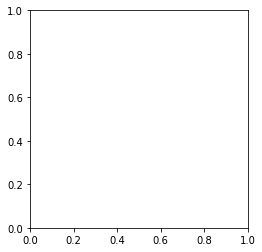

In [0]:
#manual checking of dataset
import matplotlib.pyplot as plt # conda install matplotlib -y
import numpy as np
n = 196#replace this number to check yourself
plt.imshow(np.array(x_val[n]))
print(y_train[n])


In [0]:
np.unique(labels)


array(['apple_pie', 'baklava', 'beignets', 'bread_pudding', 'cannoli',
       'carrot_cake', 'cheesecake', 'chocolate_cake', 'chocolate_mousse',
       'churros', 'creme_brulee', 'cup_cakes', 'donuts', 'ice_cream',
       'tiramisu', 'waffles'], dtype='<U16')

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y_vec = labelencoder.fit_transform(labels)



In [0]:
from keras.utils import to_categorical
y_categorical = to_categorical(y_vec)


In [0]:
from sklearn.model_selection import train_test_split
seed = 23

from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 

  

# Split dataset
X_train, X_test, y_train, Y_test = train_test_split(pixels, y_vec, test_size=0.20, random_state=seed)

print('Training set shape: {}'.format(X_train.shape))
print('Training set shape: {}'.format(y_train.shape))
print('Test set shape: {}'.format(X_test.shape))

Training set shape: (12830, 150, 150, 3)
Training set shape: (12830,)
Test set shape: (3208, 150, 150, 3)


In [0]:
x_test, x_val,y_test,y_val =train_test_split(X_test, Y_test, test_size=0.20, random_state=seed)

In [0]:
y_test.shape

(2566,)

In [0]:

from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_val_one_hot = to_categorical(y_val)

In [0]:
x_test.shape

(2566, 150, 150, 3)

In [0]:
len(x_test)


2566

In [0]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications import imagenet_utils
def create_features(dataset):
 
    x_scratch = []
 
    # loop over the images
    for i in range(0,len(dataset)):
 
        # load the input image and image is resized to 150x150 pixels
        #image = load_img(imagePath, target_size=(150, 150))
        #image = img_to_array(image)
 
        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(dataset[i], axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)
 
    x = np.vstack(x_scratch)
    return x

In [0]:
X_train.shape

(12830, 150, 150, 3)

In [0]:
train_x = create_features(X_train)
val_x = create_features(x_val)
test_x = create_features(x_test)
print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

(12830, 150, 150, 3)
(642, 150, 150, 3)
(2566, 150, 150, 3)


In [0]:
from keras.callbacks import ModelCheckpoint
# Creating a checkpointer
checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5',
                               verbose=1,save_best_only=True)
# load the VGG16 network
print("[INFO loading network...")
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=train_x.shape[1:])
model_vgg.summary()

[INFO loading network...
58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_____________________________________

In [0]:
from keras.models import Sequential
model_transfer_full = Sequential()
model_transfer_full.add(model_vgg)
model_transfer_full.add(GlobalAveragePooling2D())
model_transfer_full.add(Dropout(0.2))
model_transfer_full.add(Dense(100, activation='relu'))
model_transfer_full.add(Dense(16, activation='softmax'))
model_transfer_full.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               51300     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1616      
Total params: 14,767,604
Trainable params: 14,767,604
Non-trainable params: 0
_________________________________________________________________


In [0]:
opt = Adam(lr=0.00001)
model_transfer_full.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model_transfer_full.fit(train_x, y_train_one_hot, batch_size=32, epochs=10,
          validation_data=(val_x, y_val_one_hot), callbacks=[checkpointer],verbose=1, shuffle=True)

Train on 12830 samples, validate on 642 samples
Epoch 1/10
12830/12830 [==============================] - 198s 15ms/step - loss: 2.9358 - accuracy: 0.0840 - val_loss: 2.6299 - val_accuracy: 0.1526

Epoch 00001: val_loss improved from inf to 2.62989, saving model to scratchmodel.best.hdf5
Epoch 2/10
12830/12830 [==============================] - 182s 14ms/step - loss: 2.4900 - accuracy: 0.2013 - val_loss: 2.1836 - val_accuracy: 0.3349

Epoch 00002: val_loss improved from 2.62989 to 2.18359, saving model to scratchmodel.best.hdf5
Epoch 3/10
12830/12830 [==============================] - 182s 14ms/step - loss: 2.0037 - accuracy: 0.3813 - val_loss: 1.6616 - val_accuracy: 0.5125

Epoch 00003: val_loss improved from 2.18359 to 1.66164, saving model to scratchmodel.best.hdf5
Epoch 4/10
12830/12830 [==============================] - 183s 14ms/step - loss: 1.6150 - accuracy: 0.5086 - val_loss: 1.4659 - val_accuracy: 0.5639

Epoch 00004: val_loss improved from 1.66164 to 1.46594, saving model to

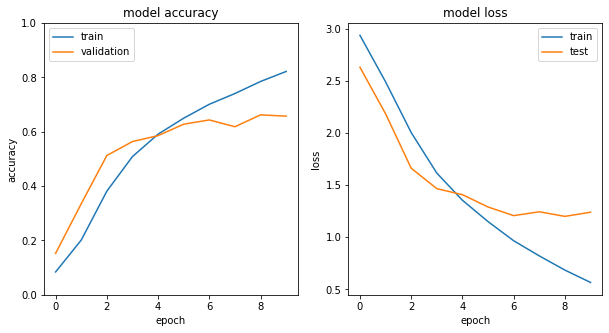

In [0]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
 
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.ylim([0, 1])
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
 
plot_accuracy_loss(history)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
preds = np.argmax(model_transfer_full.predict(test_x), axis=1)
print("\nAccuracy on Test Data: ", accuracy_score(y_test, preds))
print("\nNumber of correctly identified images: ",
      accuracy_score(y_test, preds, normalize=False),"\n")
confusion_matrix(y_test, preds, labels=range(0,16))


Accuracy on Test Data:  0.6667965705378021

Number of correctly identified images:  0.6667965705378021 



array([[ 80,  18,   1,   9,  10,   0,   1,   0,   3,   1,   0,   5,   4,
          8,   9,   4],
       [ 10, 126,   1,   1,   5,   0,   3,   1,   1,   0,   1,   0,   5,
          2,   2,   1],
       [  9,   2, 122,   3,  10,   0,   1,   1,   2,   8,   1,   2,  11,
          4,   0,   2],
       [ 34,   6,   0,  66,  10,   3,   4,   0,   4,   1,   8,   1,   0,
          7,  11,   6],
       [  4,   3,   2,   2, 132,   3,   0,   3,   1,   0,   0,   0,   3,
          1,   4,   2],
       [  4,   7,   0,   5,   4,  94,   5,   5,   4,   1,   1,   2,   0,
          7,  12,   2],
       [  3,   3,   0,   5,   1,   3,  88,   9,   2,   2,   7,   9,   2,
          5,  21,   0],
       [  1,   1,   0,   1,   3,   1,   6,  95,   6,   2,   1,  14,   4,
          7,  12,   1],
       [  2,   0,   1,   1,   6,   1,   4,  25,  70,   2,   5,  12,   3,
         19,  10,   2],
       [  1,   0,   2,   0,   8,   1,   2,   4,   2, 113,   2,   3,   3,
          5,   3,   4],
       [  2,   1,   0,   4,   

In [0]:
np.expand_dims(x_test,axis=1).shape

(2566, 1, 150, 150, 3)

In [0]:
model_json = model_transfer_full.to_json()
model_transfer_full.save_weights("drive/My Drive/Colab Notebooks/modelWeightsVGG16_66.h5")
with open("drive/My Drive/Colab Notebooks/modelVGG16_66.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
#prediction function
import os
from google.colab.patches import cv2_imshow
from sklearn.datasets import make_blobs
from skimage.io import imread
def predict2(imgArray,model):

  plt.imshow(imgArray)
  
  Xnew = np.expand_dims(imgArray, axis =0)
  #print("HI")
  #Xnew = imagenet_utils.preprocess_input(Xnew)
  #print("I can preprocess image")
  
  #
  y_prob = model.predict(Xnew)[0]
  print(model.predict_classes(Xnew))
  #print("I am able to get list of probas",y_prob)
  idxs = np.argsort(y_prob)[0]
  foods = np.unique(labels)
  #this is to check the dataset
  #print (idxs)
    
  return foods[model.predict_classes(Xnew)]

In [0]:
def check_preds():
  correct = 0
  v=[]
  for i in range(0,len(x_test)):
    #print(predict3(x_test[i],model_transfer_full),[y_test[i]])
    if(predict3(x_test[i],model_transfer_full) == np.unique(labels)[y_test[i]]):
      correct = correct+1
      v.append(i)
  return correct,v

[6]
[12]
[9]
[14]
[9]
[14]
[14]
[12]
[2]
[10]
[11]
[6]
[3]
[0]
[8]
[9]
[1]
[7]
[9]
[1]
[10]
[6]
[0]
[9]
[10]
[7]
[13]
[2]
[2]
[7]
[7]
[12]
[8]
[15]
[9]
[15]
[14]
[0]
[6]
[1]
[7]
[15]
[14]
[13]
[2]
[4]
[13]
[14]
[7]
[1]
[6]
[3]
[12]
[10]
[7]
[9]
[10]
[5]
[1]
[4]
[4]
[15]
[11]
[9]
[13]
[11]
[13]
[5]
[11]
[8]
[14]
[10]
[15]
[4]
[14]
[13]
[11]
[14]
[7]
[0]
[6]
[9]
[6]
[8]
[13]
[11]
[10]
[14]
[5]
[11]
[15]
[8]
[4]
[15]
[13]
[8]
[4]
[1]
[6]
[6]
[14]
[3]
[2]
[14]
[13]
[15]
[7]
[14]
[1]
[15]
[7]
[0]
[14]
[1]
[6]
[15]
[4]
[5]
[10]
[0]
[1]
[4]
[6]
[10]
[4]
[1]
[14]
[15]
[2]
[7]
[13]
[7]
[7]
[6]
[13]
[6]
[0]
[11]
[5]
[0]
[12]
[9]
[11]
[10]
[12]
[13]
[11]
[2]
[8]
[10]
[11]
[15]
[14]
[13]
[3]
[11]
[13]
[4]
[13]
[0]
[13]
[6]
[13]
[4]
[1]
[4]
[13]
[5]
[3]
[3]
[14]
[11]
[13]
[11]
[4]
[14]
[13]
[7]
[15]
[13]
[11]
[13]
[2]
[2]
[4]
[10]
[4]
[3]
[10]
[13]
[2]
[14]
[12]
[6]
[7]
[11]
[0]
[2]
[10]
[11]
[4]
[12]
[13]
[4]
[9]
[4]
[6]
[3]
[5]
[9]
[15]
[13]
[11]
[2]
[10]
[3]
[13]
[1]
[15]
[1]
[0]
[9]
[7]
[3]
[4]

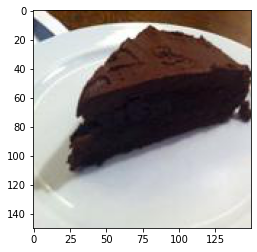

In [0]:
a,b = check_preds()
print(a,b)

In [0]:
print(a,b)

1711 [0, 2, 4, 7, 8, 9, 10, 11, 12, 14, 15, 17, 19, 20, 21, 23, 24, 25, 26, 28, 31, 32, 33, 34, 35, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49, 52, 53, 55, 56, 57, 58, 59, 60, 61, 65, 66, 67, 68, 69, 71, 72, 73, 74, 76, 78, 81, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 101, 102, 105, 107, 108, 112, 113, 115, 117, 118, 120, 122, 123, 125, 126, 127, 128, 131, 132, 134, 135, 137, 138, 141, 143, 144, 147, 149, 152, 153, 154, 159, 160, 161, 162, 163, 164, 165, 167, 170, 172, 174, 179, 181, 182, 183, 184, 185, 186, 187, 189, 190, 193, 195, 196, 197, 198, 201, 204, 206, 209, 210, 211, 213, 214, 215, 216, 218, 219, 220, 225, 226, 227, 228, 229, 230, 231, 232, 233, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 251, 252, 253, 255, 256, 258, 261, 262, 263, 264, 265, 266, 271, 272, 273, 276, 278, 279, 280, 282, 283, 284, 285, 286, 288, 290, 292, 293, 294, 295, 297, 300, 301, 302, 303, 304, 306, 307, 310, 311, 312, 313, 314, 315, 316, 317, 320, 321, 323, 324, 325, 327, 

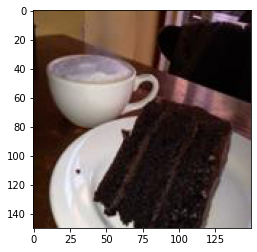

In [0]:
plt.imshow(x_test[25])

[8]
['chocolate_mousse'] 8


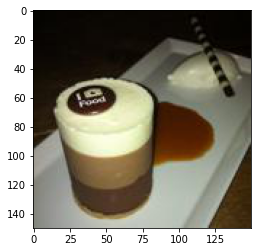

In [0]:
n = 14
print(predict3(x_test[n],model_transfer_full),y_test[n])

[8]


array([8])

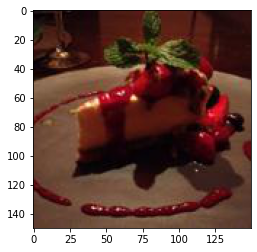

In [0]:
predict2(x_test[0],model_transfer_full)

In [0]:
import os
from google.colab.patches import cv2_imshow
from sklearn.datasets import make_blobs
from skimage.io import imread
def predict3(imgArray,model):

  plt.imshow(imgArray)
  
  Xnew = np.expand_dims(imgArray, axis =0)
  #print("HI")
  Xnew = imagenet_utils.preprocess_input(Xnew)
  #print("I can preprocess image")
  
  #
  y_prob = model.predict(Xnew)[0]
  print(model.predict_classes(Xnew))
  #print("I am able to get list of probas",y_prob)
  idxs = np.argsort(y_prob)[0]
  foods = np.unique(labels)
  #this is to check the dataset
  #print (idxs)
    
  return foods[model.predict_classes(Xnew)]

In [0]:
y_test[0]

6

In [0]:
print(a,b)

105 [0, 20, 41, 226, 268, 274, 313, 324, 329, 353, 356, 364, 452, 487, 502, 511, 520, 526, 532, 541, 663, 721, 727, 781, 791, 824, 846, 858, 881, 925, 935, 975, 994, 1007, 1037, 1043, 1066, 1073, 1084, 1087, 1090, 1109, 1158, 1196, 1205, 1235, 1245, 1264, 1275, 1315, 1324, 1326, 1339, 1344, 1366, 1397, 1419, 1459, 1477, 1493, 1498, 1530, 1536, 1556, 1559, 1588, 1636, 1643, 1677, 1743, 1768, 1781, 1862, 1876, 1883, 1895, 1903, 1907, 1931, 1940, 1981, 2004, 2023, 2025, 2034, 2089, 2100, 2165, 2175, 2177, 2221, 2226, 2252, 2267, 2282, 2330, 2353, 2373, 2394, 2415, 2435, 2442, 2505, 2551, 2563]


In [0]:
model_transfer_full.predict(np.expand_dims(X_train[0],axis=0))


array([[2.2710599e-02, 5.0144544e-04, 1.2579819e-04, 1.5145807e-04,
        3.0850098e-04, 9.8913361e-04, 5.8169634e-04, 2.5824597e-03,
        8.1284867e-05, 9.2089038e-05, 2.0031531e-04, 1.0619907e-03,
        4.2955310e-04, 9.6890748e-01, 1.2445924e-03, 3.1543776e-05]],
      dtype=float32)

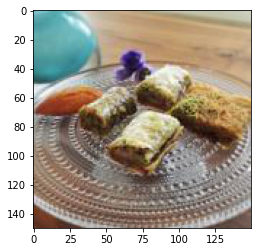

In [0]:
plt.imshow(X_train[0])

In [0]:
from keras.callbacks import ModelCheckpoint
# Creating a checkpointer
checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5',
                               verbose=1,save_best_only=True)
# load the VGG16 network
print("[INFO loading network...")
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=train_x.shape[1:])
model_vgg.summary()

[INFO loading network...
58892288/58889256 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_____________________________________

In [0]:
from keras.models import Sequential
model_transfer_full = Sequential()
model_transfer_full.add(model_vgg)
model_transfer_full.add(GlobalAveragePooling2D())
model_transfer_full.add(Dropout(0.35))
model_transfer_full.add(Dense(100, activation='relu'))
model_transfer_full.add(Dense(16, activation='softmax'))
model_transfer_full.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               51300     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1616      
Total params: 14,767,604
Trainable params: 14,767,604
Non-trainable params: 0
_________________________________________________________________


In [0]:
opt = SGD(lr=0.0001)
model_transfer_full.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model_transfer_full.fit(train_x, y_train_one_hot, batch_size=32, epochs=10,
          validation_data=(val_x, y_val_one_hot), callbacks=[checkpointer],verbose=1, shuffle=True)

Train on 12830 samples, validate on 642 samples
Epoch 1/10
12830/12830 [==============================] - 108s 8ms/step - loss: 3.0596 - accuracy: 0.0680 - val_loss: 2.7697 - val_accuracy: 0.0763

Epoch 00001: val_loss improved from inf to 2.76967, saving model to scratchmodel.best.hdf5
Epoch 2/10
12830/12830 [==============================] - 99s 8ms/step - loss: 2.7687 - accuracy: 0.0748 - val_loss: 2.7604 - val_accuracy: 0.0857

Epoch 00002: val_loss improved from 2.76967 to 2.76036, saving model to scratchmodel.best.hdf5
Epoch 3/10
12830/12830 [==============================] - 99s 8ms/step - loss: 2.7574 - accuracy: 0.0816 - val_loss: 2.7433 - val_accuracy: 0.0935

Epoch 00003: val_loss improved from 2.76036 to 2.74331, saving model to scratchmodel.best.hdf5
Epoch 4/10
12830/12830 [==============================] - 99s 8ms/step - loss: 2.7206 - accuracy: 0.1121 - val_loss: 2.6792 - val_accuracy: 0.1277

Epoch 00004: val_loss improved from 2.74331 to 2.67925, saving model to scratc

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
preds = np.argmax(model_transfer_full.predict(test_x), axis=1)
print("\nAccuracy on Test Data: ", accuracy_score(y_test, preds))
print("\nNumber of correctly identified images: ",
      accuracy_score(y_test, preds, normalize=False),"\n")
confusion_matrix(y_test, preds, labels=range(0,16))


Accuracy on Test Data:  0.3195635229929852

Number of correctly identified images:  820 



array([[ 23,  57,   6,   6,   4,   7,   1,   2,   1,   5,   3,   2,   4,
          8,   0,  24],
       [ 15,  98,   3,   4,   2,   5,   0,   0,   1,   0,   7,   1,   5,
          2,   0,  16],
       [  9,   7, 121,   3,  14,   0,   0,   1,   4,   2,   3,   3,   2,
          5,   0,   4],
       [ 30,  40,   5,  11,   4,  15,   1,   3,   9,   3,   7,   2,   2,
          2,   1,  26],
       [  9,  17,  33,   6,  38,  11,   2,   6,   0,   5,   0,   7,  13,
          3,   1,   9],
       [  5,  16,   3,   1,  11,  59,   8,   1,   2,   2,   2,   4,   1,
          2,   7,  29],
       [  7,   5,   0,   8,   8,  19,  28,  10,  13,   2,   6,  13,   1,
          4,  24,  12],
       [  1,   2,   4,   4,   6,  25,   9,  30,  14,   4,   0,  19,   1,
          2,  22,  12],
       [  6,   1,   4,   4,  10,  13,  11,  17,  20,   9,   9,  31,   5,
          9,   6,   8],
       [ 10,   9,   6,  10,   1,   6,   1,   3,   2,  56,   3,  11,  12,
          6,   1,  16],
       [  7,   1,   2,   0,   

In [0]:
#############
##SAME THING CHANGING FEW PARAMS

from keras.callbacks import ModelCheckpoint
# Creating a checkpointer
checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5',
                               verbose=1,save_best_only=True)
# load the VGG16 network
print("[INFO loading network...")
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=train_x.shape[1:])
model_vgg.summary()

from keras.models import Sequential
model_transfer_full = Sequential()
model_transfer_full.add(model_vgg)
model_transfer_full.add(GlobalAveragePooling2D())
model_transfer_full.add(Dropout(0.35))
model_transfer_full.add(Dense(100, activation='relu'))
model_transfer_full.add(Dense(16, activation='softmax'))
model_transfer_full.summary()

opt = SGD(lr=0.0001,momentum = 0.9, nesterov = True)
model_transfer_full.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model_transfer_full.fit(train_x, y_train_one_hot, batch_size=32, epochs=20,
          validation_data=(val_x, y_val_one_hot), callbacks=[checkpointer],verbose=1, shuffle=True)


[INFO loading network...
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
preds = np.argmax(model_transfer_full.predict(test_x), axis=1)
print("\nAccuracy on Test Data: ", accuracy_score(y_test, preds))
print("\nNumber of correctly identified images: ",
      accuracy_score(y_test, preds, normalize=False),"\n")
confusion_matrix(y_test, preds, labels=range(0,16))


Accuracy on Test Data:  0.6925175370226033

Number of correctly identified images:  1777 



array([[ 62,  21,   2,  20,   7,   2,   2,   0,   4,   1,   1,   2,   4,
         13,   2,  10],
       [ 10, 125,   0,   7,   1,   1,   0,   2,   2,   1,   1,   1,   3,
          5,   0,   0],
       [  4,   1, 139,   4,   1,   0,   0,   0,   2,   4,   0,   0,  13,
          5,   2,   3],
       [  9,   4,   4, 101,   4,   5,   2,   2,   6,   0,   6,   1,   1,
          6,   2,   8],
       [  3,   4,   4,   4, 128,   0,   0,   4,   2,   2,   0,   0,   1,
          2,   4,   2],
       [  1,   4,   0,   9,   2,  93,   6,   6,  10,   1,   2,   3,   2,
          5,   5,   4],
       [  5,   3,   0,   6,   1,   5,  99,   4,  14,   1,   6,   1,   3,
          4,   6,   2],
       [  0,   0,   0,   5,   1,   0,   3,  92,  24,   2,   0,  10,   3,
          6,   8,   1],
       [  1,   0,   0,   3,   4,   1,   5,  15, 106,   3,   2,   3,   2,
          9,   7,   2],
       [  0,   0,   1,   0,   2,   1,   2,   4,   7, 115,   0,   2,  10,
          4,   4,   1],
       [  0,   1,   0,   7,   

In [0]:
model_json = model_transfer_full.to_json()
model_transfer_full.save_weights("drive/My Drive/Colab Notebooks/modelWeightsVGG16_69.h5")
with open("drive/My Drive/Colab Notebooks/modelVGG16_69.json", "w") as json_file:
    json_file.write(model_json)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


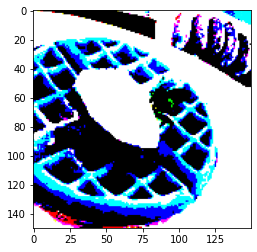

In [0]:
plt.imshow(imagenet_utils.preprocess_input(x_test[n]))

# ResNet50

In [0]:
def create_model_ResNet50():

  base_model=ResNet50(weights= None, include_top=True, classes=16,input_shape=(150,150,3)) #imports the vgg16 model and discards the last 1000 neuron layer.
  x=base_model.output
  
  #x=GlobalAveragePooling2D()(x)
  #x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
  #x=Dense(1024,activation='relu')(x) #dense layer 2
  #x=Dense(512,activation='relu')(x) #dense layer 3
  x= Dropout(0.4)(x)
  output=base_model.layers[-1].output
  #output = keras.layers.Flatten()(output)

  preds=Dense(16,activation='softmax')(x) #final layer with softmax activation
  model=Model(inputs=(base_model.input),outputs=output)
  return model
def train():
   model = create_model_ResNet50()
   opt=SGD(lr=0.001, momentum=0.9,nesterov=True)
   model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
   print(model.summary())
   
   resNet50 = model.fit(x=X_train, y=y_train_one_hot, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test_one_hot), shuffle=True)
   test_eval = model.evaluate(X_test, y_test_one_hot, verbose=0)
   print('Test loss:', test_eval[0])
   print('Test accuracy:', test_eval[1])
   return resNet50

def load_trained_model(weights_path):
   model = create_model_ResNet50()
   model.load_weights(weights_path)
   return model

ResNet50


In [0]:
train()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 8s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
___________________________

In [0]:
def create_model_ResNet50():

  base_model=ResNet50(weights= 'imagenet', include_top=False, classes=16,input_shape=(150,150,3)) #imports the vgg16 model and discards the last 1000 neuron layer.
  x=base_model.output
  
  x=GlobalAveragePooling2D()(x)
  x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
  #x=Dense(1024,activation='relu')(x) #dense layer 2
  #x=Dense(512,activation='relu')(x) #dense layer 3
  x= Dropout(0.6)(x)
  #output=base_model.layers[-1].output
  #output = keras.layers.Flatten()(output)

  preds=Dense(16,activation='softmax')(x) #final layer with softmax activation
  model=Model(inputs=(base_model.input),outputs=preds)
  return model
def train():
   model = create_model_ResNet50()
   opt=SGD(lr=0.0001, momentum=0.9,nesterov=True)
   model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
   print(model.summary())
   
   resNet50 = model.fit(x=X_train, y=y_train_one_hot, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test_one_hot), shuffle=True)
   test_eval = model.evaluate(X_test, y_test_one_hot, verbose=0)
   print('Test loss:', test_eval[0])
   print('Test accuracy:', test_eval[1])
   model.plot(resNet50.history['accuracy'])
   model.plot(resNet50.history['val_accuracy'])
   model.title('Model accuracy')
   model.ylabel('Accuracy')
   model.xlabel('Epoch')
   model.legend(['Train', 'Val'], loc='upper left')
   model.show()
#Visualize the models loss
   model.plot(resNet50.history['loss'])
   model.plot(resNet50.history['val_loss'])
   model.title('Model loss')
   model.ylabel('Loss')
   model.xlabel('Epoch')
   model.legend(['Train', 'Val'], loc='upper right')
   model.show()
   return resNet50

   


In [0]:
import os
from google.colab.patches import cv2_imshow
from sklearn.datasets import make_blobs
def predict(pathToImg,model):
  
  #this is to check the dataset
  if(os.path.isfile(pathToImg)):
    fig = plt.figure(figsize=(20, 8))
    im = imread(pathToImg)
    Xnew = np.array(im)
    plt.imshow(Xnew)
    Xnew = np.expand_dims(im, axis =0)
    y_prob = model.predict(Xnew)[0]
    idxs = np.argsort(y_prob)[0]
    
    return idxs
  else:
    print("That file does not exist")
    return

In [0]:
#this is an example of transfer learning using ResNet50
def create_model_ResNet50():

  base_model=ResNet50(weights= 'imagenet', include_top=False, classes=16,input_shape=(150,150,3)) #imports the vgg16 model and discards the last 1000 neuron layer.
  x=base_model.output
  
  #x=GlobalAveragePooling2D()(x)
  #x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
  #x=Dense(1024,activation='relu')(x) #dense layer 2
  #x=Dense(512,activation='relu')(x) #dense layer 3
  x= Dropout(0.4)(x)
  output=base_model.layers[-1].output
  #output = keras.layers.Flatten()(output)

  preds=Dense(16,activation='softmax')(x) #final layer with softmax activation
  model=Model(inputs=(base_model.input),outputs=preds)
  return model
def train():
   model = create_model_ResNet50()
   opt=SGD(lr=0.001, momentum=0.9,nesterov=True)
   model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
   print(model.summary())
   
   resNet50 = model.fit(x=X_train, y=y_train_one_hot, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test_one_hot), shuffle=True)
   test_eval = model.evaluate(X_test, y_test_one_hot, verbose=0)
   print('Test loss:', test_eval[0])
   print('Test accuracy:', test_eval[1])
   return model

def load_trained_model(weights_path):
   model = create_model_ResNet50()
   model.load_weights(weights_path)
   return model

In [0]:
resnet50_model = train()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

ValueError: ignored

# InceptionV3


In [0]:
#this is an example of transfer learning using ResNet50
def create_model_InceptionV3_2():
  model = InceptionV3(weights='imagenet',include_top=False)
  x = model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(1024, activation='relu')(x)
  #x = Dropout(0.5)(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.6)(x)
  out = Dense(16,activation='softmax')(x)
  model_final = Model(input = model.input,outputs=out)
  print(model_final.summary())
  return model_final
def trainInceptionV3_2():
   model = create_model_InceptionV3_2()
   opt=SGD(lr=0.01, momentum=0.9,nesterov=True)
   model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
   
   
   inceptionV3 = model.fit(x=X_train, y=y_train_one_hot, batch_size=32, epochs=25, verbose=1, validation_data=(X_test, y_test_one_hot), shuffle=True)
   test_eval = model.evaluate(X_test, y_test_one_hot, verbose=0)

   print('Test loss:', test_eval[0])
   print('Test accuracy:', test_eval[1])
   return model


In [0]:
mod_IV3_v2 = trainInceptionV3_2()

87916544/87910968 [==============================] - 3s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  # This is added back by InteractiveShellApp.init_path()


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [0]:
model_json = mod_IV3_v2.to_json()
mod_IV3_v2.save_weights("drive/My Drive/Colab Notebooks/modelWeights58_IV3.h5")
with open("drive/My Drive/Colab Notebooks/model_IV3_58.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
#this is an example of transfer learning using ResNet50
def create_model_InceptionV3():
  model = InceptionV3(weights='imagenet',include_top=False)
  x = model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(512, activation='relu')(x)
  #x = Dropout(0.5)(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.65)(x)
  out = Dense(16,activation='softmax')(x)
  model_final = Model(input = model.input,outputs=out)
  print(model_final.summary())
  return model_final
def trainInceptionV3():
   model = create_model_InceptionV3()
   opt=SGD(lr=0.01, momentum=0.9,nesterov=True)
   model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
   
   
   inceptionV3 = model.fit(x=X_train, y=y_train_one_hot, batch_size=32, epochs=15, verbose=1, validation_data=(X_test, y_test_one_hot), shuffle=True)
   test_eval = model.evaluate(X_test, y_test_one_hot, verbose=0)

   print('Test loss:', test_eval[0])
   print('Test accuracy:', test_eval[1])
   return model


In [0]:
inceptionV3 = trainInceptionV3()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  # Remove the CWD from sys.path while we load stuff.


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_283 (Conv2D)             (None, None, None, 3 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_283 (BatchN (None, None, None, 3 96          conv2d_283[0][0]                 
__________________________________________________________________________________________________
activation_283 (Activation)     (None, None, None, 3 0           batch_normalization_283[0][0]    
____________________________________________________________________________________________

In [0]:
model_json = inceptionV3.to_json()
inceptionV3.save_weights("drive/My Drive/Colab Notebooks/modelWeights60.h5")
with open("drive/My Drive/Colab Notebooks/model_Inception60.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
#this is an example of transfer learning using InceptionV3 using preprocess_input
def create_model_InceptionV3_norm():
  model = InceptionV3(weights='imagenet',include_top=False)
  x = model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(512, activation='relu')(x)
  #x = Dropout(0.5)(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.5)(x)
  out = Dense(16,activation='softmax')(x)
  model_final = Model(input = model.input,outputs=out)
  print(model_final.summary())
  return model_final
def trainInceptionV3_v2():
   model = create_model_InceptionV3_norm()
   opt=SGD(lr=0.001, momentum=0.9,nesterov=True)
   model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
   
   
   inceptionV3 = model.fit(x=preprocess_input(X_train), y=y_train_one_hot, batch_size=64, epochs=15, verbose=1, validation_data=(preprocess_input(X_test), y_test_one_hot), shuffle=True)
   test_eval = model.evaluate(preprocess_input(X_test, y_test_one_hot, verbose=0)
   print('Test loss:', test_eval[0])
   print('Test accuracy:', test_eval[1])
   return inceptionV3

In [0]:

trainInceptionV3_v2()


Mon May 11 16:31:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    34W / 250W |   8739MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  # Remove the CWD from sys.path while we load stuff.


Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_565 (Conv2D)             (None, None, None, 3 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_565 (BatchN (None, None, None, 3 96          conv2d_565[0][0]                 
__________________________________________________________________________________________________
activation_565 (Activation)     (None, None, None, 3 0           batch_normalization_565[0][0]    
____________________________________________________________________________________________

In [0]:
#Yet another test- this time changing optimizer
#this is an example of transfer learning using InceptionV3 using preprocess_input
def create_model_InceptionV3_norm():
   model = InceptionV3(weights='imagenet',include_top=False,input_shape=(150,150,3))
   x = model.output
   x = GlobalAveragePooling2D()(x)
   x = Dense(1024, activation='relu')(x)
   #x = Dropout(0.5)(x)
   x = Dense(512, activation='relu')(x)
   x = Dropout(0.5)(x)
   out = Dense(16,activation='softmax')(x)
   model_final = Model(input = model.input,outputs=out)
   print(model_final.summary())
   opt=Adam(learning_rate=0.01)
   model_final.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
   
   
   inceptionV3 = model_final.fit(x=preprocess_input(X_train), y=y_train_one_hot, batch_size=64, epochs=15, verbose=1, validation_data=(preprocess_input(X_test), y_test_one_hot), shuffle=True)
   test_eval = model_final.evaluate(preprocess_input(X_test), y_test_one_hot, verbose=0)
   print('Test loss:', test_eval[0])
   print('Test accuracy:', test_eval[1])
   inceptionV3.plot(hist.history['accuracy'])
   inceptionV3.plot(hist.history['val_accuracy'])
   inceptionV3.title('Model accuracy')
   inceptionV3.ylabel('Accuracy')
   inceptionV3.xlabel('Epoch')
   inceptionV3.legend(['Train', 'Val'], loc='upper left')
   inceptionV3.show()
#Visualize the models loss
   inceptionV3.plot(hist.history['loss'])
   inceptionV3.plot(hist.history['val_loss'])
   inceptionV3.title('Model loss')
   inceptionV3.ylabel('Loss')
   inceptionV3.xlabel('Epoch')
   inceptionV3.legend(['Train', 'Val'], loc='upper right')
   inceptionV3.show()
   return model_final

In [0]:
modelInceptionV3 = create_model_InceptionV3_norm()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  # Remove the CWD from sys.path while we load stuff.


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_377 (Conv2D)             (None, 74, 74, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_377 (BatchN (None, 74, 74, 32)   96          conv2d_377[0][0]                 
__________________________________________________________________________________________________
activation_377 (Activation)     (None, 74, 74, 32)   0           batch_normalization_377[0][0]    
____________________________________________________________________________________________

KeyboardInterrupt: ignored

# VGG16


In [0]:
from keras.applications.vgg16 import preprocess_input
def create_model_VGG16():  

  model = VGG16(weights='imagenet',include_top=False)
  x = model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(512, activation='relu')(x)
  
  x = Dense(128, activation='relu')(x)
  #x = Dropout(0.6)(x)
  out = Dense(16,activation='softmax')(x)
  model_final = Model(input = model.input,outputs=out)
  return model_final

def trainVGG16():
   model = create_model_VGG16()
   opt=Adam(learning_rate=0.00001)
   model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
   #x_train=preprocess_input(X_train)
   #x_test=preprocess_input(X_test)
   vgg16 = model.fit(x=(X_train), y=y_train_one_hot, batch_size=64, epochs=15, verbose=1, validation_data=(X_test, y_test_one_hot), shuffle=True)
   test_eval = model.evaluate(X_test, y_test_one_hot, verbose=0)
   print('Test loss:', test_eval[0])
   print('Test accuracy:', test_eval[1])  
#Visualize the models accuracy
   model.plot(vgg16.history['accuracy'])
   model.plot(vgg16.history['val_accuracy'])
   model.title('Model accuracy')
   model.ylabel('Accuracy')
   model.xlabel('Epoch')
   model.legend(['Train', 'Val'], loc='upper left')
   model.show()
#Visualize the models loss
   model.plot(hist.history['loss'])
   model.plot(hist.history['val_loss'])
   model.title('Model loss')
   model.ylabel('Loss')
   model.xlabel('Epoch')
   model.legend(['Train', 'Val'], loc='upper right')
   model.show()
   return model

# InceptionResNetV2

# In conclusion and some tests

According to our tests, with our dataset- InceptionV3 seems to be the best model

In [0]:
#prediction function
import os
from google.colab.patches import cv2_imshow
from sklearn.datasets import make_blobs
from skimage.io import imread
def predict(pathToImg,model):
  
  #this is to check the dataset
  if(os.path.isfile(pathToImg)):
    fig = plt.figure(figsize=(20, 8))
    im = imread(pathToImg)
    Xnew = np.array(im)
    plt.imshow(Xnew)
    Xnew = np.expand_dims(im, axis =0)
    y_prob = model.predict(Xnew)[0]
    idxs = np.argsort(y_prob)[0]
    foods = np.unique(labels)

    
    return foods[idxs]
  else:
    print("That file does not exist")
    return

In [0]:
# load json and create model
from keras.models import model_from_json
json_file = open('drive/My Drive/Colab Notebooks/model_Inception60.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("drive/My Drive/Colab Notebooks/modelWeights60.h5")
opt=SGD(lr=0.01, momentum=0.9,nesterov=True)
loaded_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test_one_hot, verbose=0)
print (score)



[1.8580388358034696, 0.6109725832939148]


In [0]:
#prediction function
import os
from google.colab.patches import cv2_imshow
from sklearn.datasets import make_blobs
from skimage.io import imread
def predict2(imgArray,model):

  plt.imshow(imgArray)
  Xnew = np.expand_dims(imgArray, axis =0)
  y_prob = model.predict(Xnew)[0]
  idxs = np.argsort(y_prob)[0]
  foods = np.unique(labels)
  #this is to check the dataset
  #print (idxs)
    
  return foods[idxs]

chocolate_mousse baklava


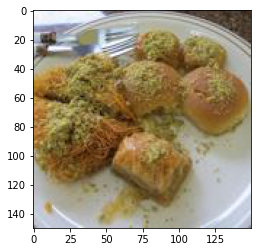

In [0]:
#this is the model trained without weights from imageNet
n=102
print(predict2(pixels[n],loaded_model),labels[n])


In [0]:
# load json and create model 
from keras.models import model_from_json
json_file = open('drive/My Drive/Colab Notebooks/model_IV3_58.json', 'r')
loaded_model_json2 = json_file.read()
json_file.close()
loaded_model2 = model_from_json(loaded_model_json2)

# load weights into new model


In [0]:
X_test[0].shape

(150, 150, 3)

In [0]:
loaded_model2.load_weights("drive/My Drive/Colab Notebooks/modelWeights58_IV3.h5")
opt=SGD(lr=0.01, momentum=0.9,nesterov=True)
loaded_model2.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test_one_hot, verbose=0)
print (score)



[2.0678056946716405, 0.5816708207130432]


ice_cream creme_brulee


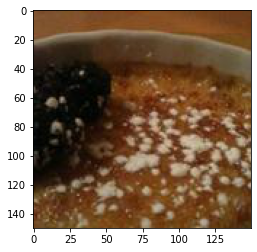

In [0]:
n=103
print(predict2(pixels[n],loaded_model),labels[n])

array(['baklava', 'baklava', 'chocolate_cake', ..., 'carrot_cake',
       'baklava', 'churros'], dtype='<U16')

In [0]:
l = np.array(y_vec)


array([1, 1, 7, ..., 5, 1, 9])

In [0]:
foods = np.unique(labels)

In [0]:
foods

array(['apple_pie', 'baklava', 'beignets', 'bread_pudding', 'cannoli',
       'carrot_cake', 'cheesecake', 'chocolate_cake', 'chocolate_mousse',
       'churros', 'creme_brulee', 'cup_cakes', 'donuts', 'ice_cream',
       'tiramisu', 'waffles'], dtype='<U16')

In [0]:
ind = np.unique(y_vec)

In [0]:
ind

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])